In [1]:
# KNN - on iris dataset
# preprocessing

import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

C:\Users\Amrita\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


'''
4. Relevant Information:
   --- This is perhaps the best known database to be found in the pattern
       recognition literature. The data set contains 3 classes of 50 instances each,
       where each class refers to a type of iris plant.  
       One class is linearly separable from the other 2; 
       the latter are NOT linearly separable from each other.
   --- Predicted attribute: class of iris plant.

5. Number of Instances: 150 (50 in each of three classes)

6. Number of Attributes: 4 numeric, predictive attributes and the class

7. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

8. Missing Attribute Values: None
'''

In [2]:
location = r"E:\Python\Machine Learning\datasets\iris.csv"


In [3]:
# load the training data from breast cancer data set
df_iris = pd.read_csv(location)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Check the available styles
# plt.style.available

In [5]:
plt.style.use('ggplot')

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Means are in the same order of magnitude for all features 
# so scaling might not be beneficial.

# If mean values were of different orders of magnitude, scaling could 
# significantly improve accuracy of a classifier.

df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# drop target variable
X = df_iris.drop('class' , 1).values 

y1 = df_iris['class'].values

y  = df_iris['class']

In [10]:
# Scaling of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

print('X_scaled type is', type(X_scaled))
X_scaled

X_scaled type is <class 'numpy.ndarray'>


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [13]:
# transform back to df for easier exploration/plotting (output of scaler)
X_scaled_df = pd.DataFrame(X_scaled, columns=['s_SepalLength',
                                              's_SepalWidth',
                                              's_PetalLength',
                                              's_PetalWidth'])

X_scaled_df.head()

,s_SepalLength,s_SepalWidth,s_PetalLength,s_PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [14]:
df_iris_scaled = pd.concat([X_scaled_df,y],axis=1)
df_iris_scaled.head()

,s_SepalLength,s_SepalWidth,s_PetalLength,s_PetalWidth,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


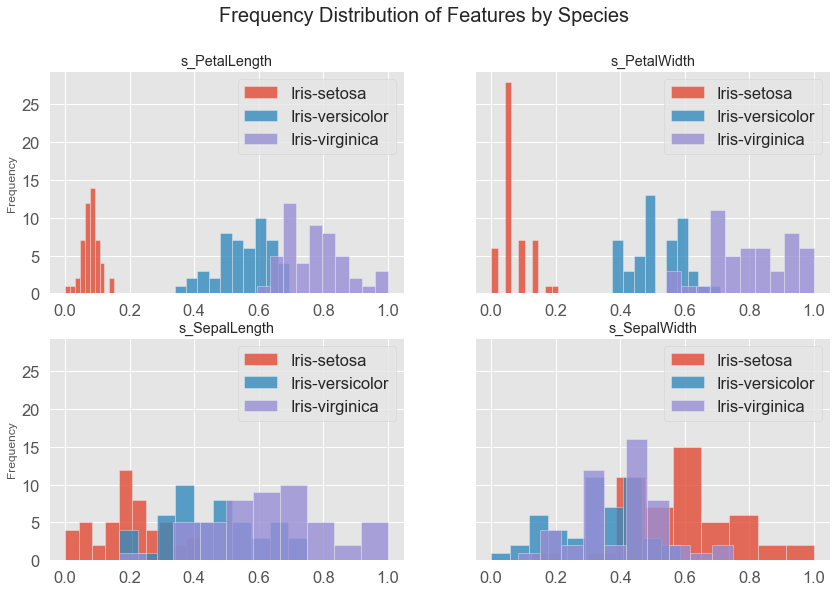

In [18]:
# Notice x-axis on subplots are all the same for all features (0 to 1) 
# after scaling.
fig = plt.figure(figsize=(14,9))
fig.suptitle('Frequency Distribution of Features by Species ',fontsize=20)

ax1 = fig.add_subplot(221)
df_iris_scaled.groupby("class").s_PetalLength.plot(kind='hist',
                                                   alpha=0.8,
                                                   legend=True,
                                                   title='s_PetalLength')

ax2 = fig.add_subplot(222,sharey=ax1)
df_iris_scaled.groupby("class").s_PetalWidth.plot(kind='hist',
                                                  alpha=0.8,
                                                  legend=True,
                                                  title='s_PetalWidth')

ax3 = fig.add_subplot(223,sharey=ax1)
df_iris_scaled.groupby("class").s_SepalLength.plot(kind='hist',
                                                   alpha=0.8,
                                                   legend=True,
                                                   title='s_SepalLength')

ax4 = fig.add_subplot(224,sharey=ax1)
df_iris_scaled.groupby("class").s_SepalWidth.plot(kind='hist',
                                                  alpha=0.8,
                                                  legend=True,
                                                  title='s_SepalWidth');

In [19]:
X_scaled_df.describe()

,s_SepalLength,s_SepalWidth,s_PetalLength,s_PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [15]:
# train and test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
#print("train sample size",X_train.shape, type(X_train))
#print("test sample size",X_test.shape, type(X_test))

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# instantiate the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [18]:
# fit the training data
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = clf.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


In [20]:
# Creates a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

In [21]:
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [21]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

In [22]:
cm_df

,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,17,1
virginica,0,0,11


Text(0.5,11,'Predicted label')

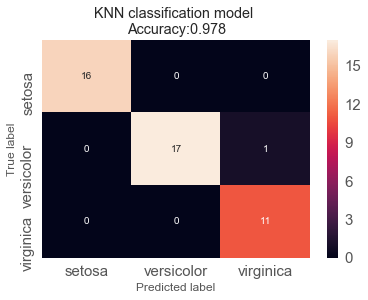

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True)
plt.title('KNN classification model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [24]:
# model overall accuracy on the test set was 0.978 
# (Accurate predictions/All or True Positives/All).

# However, the confusion matrix gives additional insight into accuracy by class and intuition 
# for precision and recall efficiency.

# An insight we can get from the matrix is that the model was very accurate at classifying 
# setosa and versicolor (True Positive/All = 1.0). However, accuracy for virginica was lower 
# (11/12 = 0.917).

In [25]:
# metrics from confusion matrix
# Classification accuracy : Overall how often is the classifier correct?

from sklearn.metrics import accuracy_score 
print(metrics.accuracy_score(y_test, y_pred))

# classification error : Overall how often is the classifier incorrect?
print(1-metrics.accuracy_score(y_test, y_pred))

# Sensitivity : when the actual value is +ve, how often is the predication correct
# Also known as "True Positive Rate" or 'Recall"
# should be MAXIMIZED
# print(metrics.recall_score(y_test, y_pred, average='none'))

# Specificity: When the actual value is -ve, how often the prediction correct
# Also known as "Selective"
# should be MAXIMIZED

# False Positive Rate : when the actual value is negative, how often is the 
# prediction incorrect
# 1- Specificity

# Precision: when a +ve value is predicted, how often is the prediction correct?
# print(metrics.precision_score(y_test, y_pred, average='none'))

0.9777777777777777
0.022222222222222254


In [26]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.98      0.98      0.98        45

